In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
beta = 0.5     # infection rate
gamma = 0.1    # recovery rate
mu = 0.01      # death rate
k = 0.9        # non-linear contact rate
dt = 1         # time step (days)
T = 160        # total simulation time

In [23]:
# Initial values
N = 10_000
S0, I0, R0, D0 = N-10, 10, 0, 0

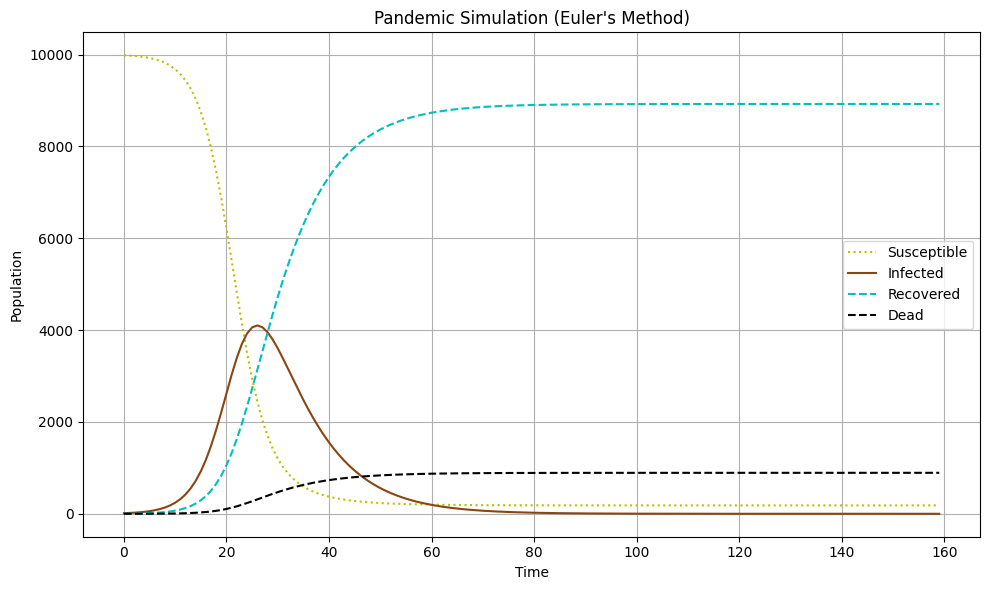

In [28]:
# Eulers model
def euler_step(S, I, R, D, beta, gamma, mu, k, dt, N):
    ln_term = np.log(1 + beta * I / N)
    dS = -k * S * ln_term
    dI = -dS - (gamma + mu) * I
    dR = gamma * I
    dD = mu * I

    S = S + dt * dS
    I = I + dt * dI
    R = R + dt * dR
    D = D + dt * dD
    
    return S, I, R, D

# Simulation
S, I, R, D = S0, I0, R0, D0
time = np.arange(0, T, dt)
S_list, I_list, R_list, D_list = [], [], [], []
for t in time:
    S, I, R, D = euler_step(S, I, R, D, beta, gamma, mu, k, dt,N)
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    D_list.append(D)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, S_list, 'y:', label='Susceptible')
plt.plot(time, I_list, 'saddlebrown', label='Infected')
plt.plot(time, R_list, 'c--', label='Recovered')
plt.plot(time, D_list, 'k--', label='Dead')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Pandemic Simulation (Euler's Method)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
